# Descripción
* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.

* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price.

* A diferencia de otras sesiones donde implementábamos el preprocesamiento a mano, ahora haremos uso de los archivos serializados en la sesión pasada.

# Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías clásicas a utilizar.

* Para este ejercicio Random Forest de Regresión De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.

* Elimine la columna 'Unnamed: 0' cuando cargue los datos.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score



In [2]:
df= pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

In [3]:
df.sample()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
719,Two_Story_1945_and_Older,Residential_Medium_Density,121,17671,Pave,Gravel,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,11,2009,WD,Normal,168000,-93.610582,42.028104


# Ejercicio 2: Importación de archivos serializados

* Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.

* No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas.


In [8]:
pickle_in = open("Laura-Fierro-actividad07.sav","rb")

In [9]:
best_model_reg_tree = pickle.load(pickle_in)
X_train=pickle.load(pickle_in)
y_train=pickle.load(pickle_in)
X_test=pickle.load(pickle_in)
y_test=pickle.load(pickle_in)

In [14]:
print("MSE:", mean_squared_error(y_test, best_model_reg_tree.predict(X_test)))
print("MAE:", median_absolute_error(y_test, best_model_reg_tree.predict(X_test)))
print("R2:", r2_score(y_test, best_model_reg_tree.predict(X_test)))

MSE: 1493544414.3190699
MAE: 15407.83783783784
R2: 0.7789915901496415


# Ejercicio 3: Evaluación Random Forest


* En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiperparámetros, sólo declarando la semilla pseudoaleatoria.

* Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero.

In [12]:
Random_forest=RandomForestRegressor(random_state=112325)
Random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=112325)

In [13]:
print("MSE:", mean_squared_error(y_test, Random_forest.predict(X_test)))
print("MAE:", median_absolute_error(y_test, Random_forest.predict(X_test)))
print("R2:", r2_score(y_test, Random_forest.predict(X_test)))

MSE: 954453345.7566264
MAE: 12162.333333333314
R2: 0.8587640151845111


Sólo usando Random Forest, se obtuvo una mejora importante. El MSE bajó un casi un  37%  y el MAE disminuyó un  22% , de modo que el nuevo modelo genera predicciones más cercanas al resultado buscado. Por otro laro, el  𝑅2  subió en  0.08 , teniendo el nuevo modelo una mejor capacidad de explicar el fenómeno en estudio.

# Ejercicio 4: Reporte las métricas de desempeño

* Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiperparámetros:

  * max_features : None , log2 , sqrt .
  * n_estimators : Evaluar entre 20 y 1000 en pasos de 50.

* Guarde la tasa de error en la exactitud medida con OOB.
* Grafique el comportamiento.


In [35]:
n_estimators=range(20,1000,50)
tmp_oob_None, tmp_oob_log2, tmp_oob_sqrt = [], [], []

In [36]:
for i in n_estimators:
    tmp_rf_None=RandomForestRegressor(n_estimators=i,max_features=None,
                                      oob_score=True,random_state=112325).fit(X_train,y_train)
    
    tmp_rf_log2=RandomForestRegressor(n_estimators=i,max_features='log2',
                                       oob_score=True,random_state=112325).fit(X_train,y_train)
    
    tmp_rf_sqrt=RandomForestRegressor(n_estimators=i,max_features='sqrt',
                                      oob_score=True,random_state=112325).fit(X_train,y_train)
    
    tmp_oob_None.append(1-tmp_rf_None.oob_score_)
    tmp_oob_log2.append(1-tmp_rf_log2.oob_score_)
    tmp_oob_sqrt.append(1-tmp_rf_sqrt.oob_score_)

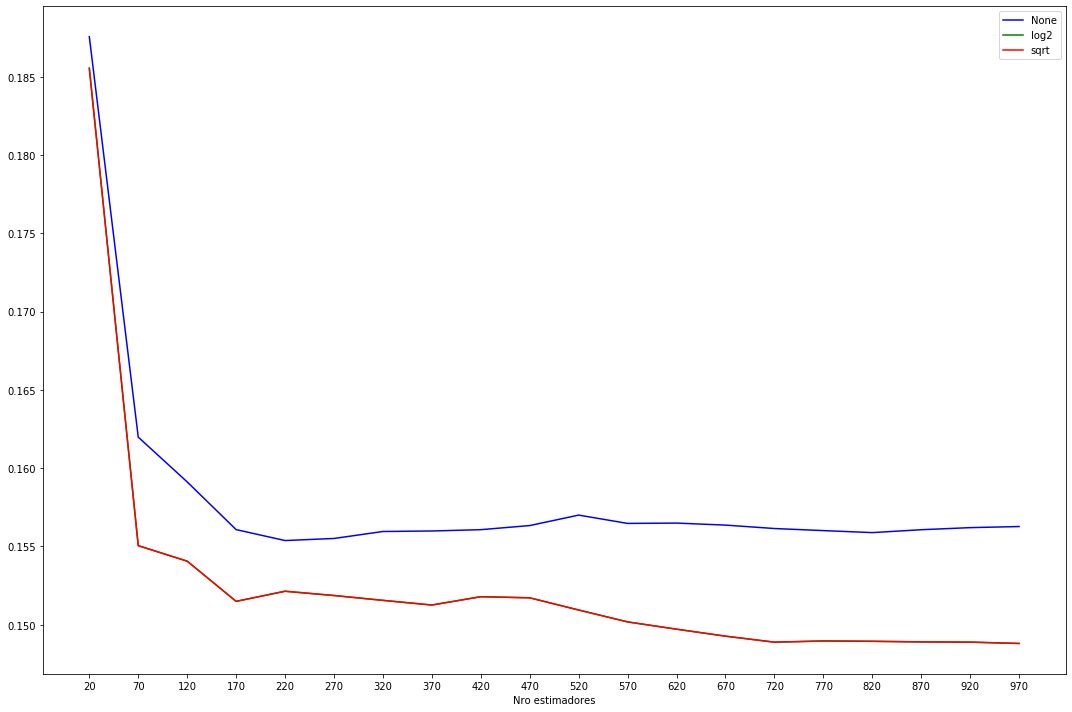

In [43]:
plt.figure(figsize=(15,10))
plt.plot(n_estimators,tmp_oob_None, color='b',label='None')
plt.plot(n_estimators,tmp_oob_log2, color='g',label='log2')
plt.plot(n_estimators,tmp_oob_sqrt, color='r',label='sqrt')
plt.xlabel('Nro estimadores')
plt.xticks(n_estimators)
plt.tight_layout()
plt.legend();

# Ejercicio 5: Refactorice el modelo
- En base a la mejor combinación de hiperparámetros, reentrene el modelo y comente su desempeño.